In [1]:
"""module和数据导入"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from torch.utils.tensorboard import SummaryWriter

import torch
from torch import nn
import math
import random
from torch.utils.data import DataLoader,TensorDataset
from torch import optim
from sklearn.model_selection import train_test_split

In [4]:
a = np.random.randint(0,10,size=(4,4))
print(a)

[[2 2 7 5]
 [9 8 9 8]
 [5 9 4 6]
 [8 5 2 0]]


In [5]:
b = np.take(a,[2,3,1,0],axis=1)

In [6]:
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = torch.tensor([44, 55, 66, 44, 55, 66, 44, 55, 66, 44, 55, 66])

# TensorDataset对tensor进行打包
train_ids = TensorDataset(a, b)
for x_train, y_label in train_ids:
    print(x_train, y_label)

# dataloader进行数据封装
print('=' * 80)
train_loader = DataLoader(dataset=train_ids, batch_size=4, shuffle=True)
for i, data in enumerate(train_loader, 1):
# 注意enumerate返回值有两个,一个是序号，一个是数据（包含训练数据和标签）
    x_data, label = data
    print(' batch:{0} x_data:{1}  label: {2}'.format(i, x_data, label))

tensor([1, 2, 3]) tensor(44)
tensor([4, 5, 6]) tensor(55)
tensor([7, 8, 9]) tensor(66)
tensor([1, 2, 3]) tensor(44)
tensor([4, 5, 6]) tensor(55)
tensor([7, 8, 9]) tensor(66)
tensor([1, 2, 3]) tensor(44)
tensor([4, 5, 6]) tensor(55)
tensor([7, 8, 9]) tensor(66)
tensor([1, 2, 3]) tensor(44)
tensor([4, 5, 6]) tensor(55)
tensor([7, 8, 9]) tensor(66)
 batch:1 x_data:tensor([[1, 2, 3],
        [7, 8, 9],
        [7, 8, 9],
        [7, 8, 9]])  label: tensor([44, 66, 66, 66])
 batch:2 x_data:tensor([[1, 2, 3],
        [7, 8, 9],
        [4, 5, 6],
        [4, 5, 6]])  label: tensor([44, 66, 55, 55])
 batch:3 x_data:tensor([[1, 2, 3],
        [4, 5, 6],
        [4, 5, 6],
        [1, 2, 3]])  label: tensor([44, 55, 55, 44])


In [ ]:
train_data = pd.read_csv(r'D:/JupyterProject/digit-recognizer/train.csv').astype('float32')
test_data = pd.read_csv(r'D:/JupyterProject/digit-recognizer/test.csv').astype('float32')

targets_numpy = train_data.label.values
features_numpy = train_data.drop(columns='label').values / 255
testTensor = torch.from_numpy(test_data.values / 255).view(-1,1,28,28)

features_train, features_test, targets_train, targets_test = train_test_split(
    features_numpy, targets_numpy, test_size=0.2, random_state=42)

featuresTrain = torch.from_numpy(features_train).view(-1,1,28,28)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)
featuresTest = torch.from_numpy(features_test).view(-1,1,28,28)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

data_train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
data_test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)
n

In [7]:
batch_size = 100
n_iters = 10000
# num_epochs = n_iters / (len(features_train) / batch_size)
# num_epochs = int(num_epochs)
num_epochs = 10

#  ---------------------------
# 模型(LeNet,Kaggle model)

In [17]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc3 = nn.Linear(16 * 4 * 4, 10)
        self.fc4 = nn.Linear(120, 84)
        self.fc5 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = torch.sigmoid(self.fc3(x))
        return x

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p = 0.2),
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p = 0.25),
            nn.Conv2d(1, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout(p = 0.25),
            )
        self.norm1 = nn.BatchNorm2d(128)
        self.dropout1 = nn.Dropout(p=0.25)
        self.flatten2 = nn.Linear(128,10)
    def forward(self, x):
        x = self.features(x)
        flatten1 = nn.Linear(x.reshape(1,-1).squeeze(),128)
        x = torch.relu(flatten1(x))
        x = self.norm1(x)
        x = self.dropout1(x)
        x = torch.sigmoid(self.flatten2(x))
        return x

In [18]:
model = Net()
model.train()
lr = 0.01
criterion = nn.CrossEntropyLoss()  # 损失函数
optimizer = optim.Adam(
    model.parameters(),
    lr=lr)  # 随机梯度优化
train_loss = []
log_interval = 10
test_losses = []
writer =  SummaryWriter(os.getcwd() + '\\log1')

## train and test

In [20]:
def train(epoch):
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(data_train_loader):

        """
        batch_idx批次编号
        inputs 批处理数据集size等于dataloader中的batch_size
        targets目标集
        """
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)      #有target才有loss
        loss.backward()           #损失反向传播
        optimizer.step()
        train_loss.append(loss.item())
        _, predicted = outputs.max(1)
        """outputs.max(1)返回index,value"""
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        train_acc = correct/total
        writer.add_scalar('acc_train',train_acc)

        if batch_idx % log_interval == 0:
            print(
                'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch,
                    batch_idx * len(inputs),
                    len(train_data),
                    100. * batch_idx / len(data_train_loader),
                    loss.item()))
            print(batch_idx,
                  len(train_data),
                  'Acc: {0:4f}%({1}/{2})'.format(100. * correct / total,
                                                 correct,
                                                 total))
    writer.add_scalar('acc_train',train_acc,epoch)



def test():
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in data_test_loader:
            output = model(data)
            """data的size（N，C，H，W），output的size（N，最后一层的维度）"""
            test_loss += criterion(output, target).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
            total += target.size(0)      #数据类型int
            test_acc = torch.true_divide(correct,total)
    test_loss /= len(test_data)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, total, 100. * correct / total))
    writer.add_scalar('acc_test',test_acc,epoch)


for epoch in range(1, num_epochs + 1):
    train(epoch)
    test()


RuntimeError: Given groups=1, weight of size [32, 1, 3, 3], expected input[100, 32, 28, 28] to have 1 channels, but got 32 channels instead

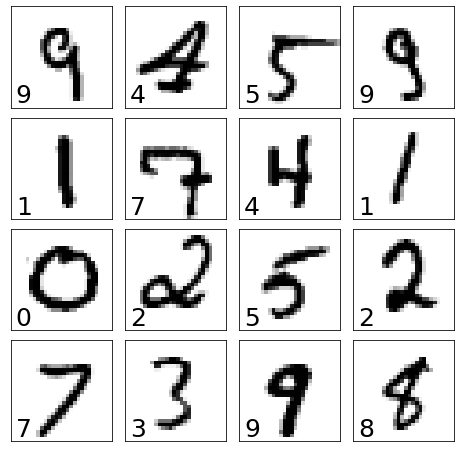

In [9]:
random_index = np.random.randint(0, len(test_data), 16)
predict = model(testTensor[random_index])
predict_result = predict.data.max(1)[1].numpy()

fig, axes = plt.subplots(4, 4, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_data.iloc[random_index[i]].values.reshape(28,28), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(predict_result[i]),
                transform=ax.transAxes, size = 25,color='black')


plt.show()

In [1]:
if aaa:

NameError: name 'aaa' is not defined